# Final Project: Regression Techniques with House Prices

Samuel Terry

Geena Kim

CSPB 3022

7 December, 2020

In [1]:
# Import essential modules

%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import patsy
import sklearn
import statsmodels.formula.api as smf
from sklearn import linear_model

In [2]:
# Read training and test data into dataframes

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Part 1: Data Cleaning

The first thing I did to clean this dataset was to drop the remove the extraneous 'Id' column from the two datasets, since the Pandas dataframe includes row indices automatically. I also noticed that the vast majority of 'Alley' data were NaN values, indicating that there was no alley access for that particular residence. Less than 100 residences had alley access at all, and I decided to remove this column. When I looked at the total number of NaN values for each feature in the dataset, I noticed that the majority of the data for the Pool Quality feature were null. This was because NaN values were used to encode the pool quality for those residences which did not have pools. While I thought that the presence or absence of a pool could have a significant impact on the ultimate sale price of each residence, I did not think that the quality of the pool would be as important--and anyway, I was sure that the pool quality could be reasonably predicted from some other feature, given a dataset of residences with enough pools. Since only 7 of the residences in the training data set actually had pools, I elected to drop this feature as well. I did the same for the MiscFeature (and the corresponding MiscVal) column, since few residences had a miscellaneous feature to be valued. Although several hundred data points did contain a value for the 'Fence' feature, I figured there weren't enough such residences to make this feature a useful predictor, and dropped this column as well; I did the same with the Fireplace quality feature, as there were quite a few (though not a majority of) residences without fireplaces, but since the presence/absence & number of fireplaces was encoded by the 'Fireplaces' column, I decided to keep this around. I also removed the GarageYrBlt column; although relatively few values were missing for this attribute; I thought that the quality of a garage was likely more significant than its age, and there wasn't a good way to fill in missing values for this feature.

There were a lot of NaN values for the 'LotFrontage' feature--that is, the feature encoding linear feet of street are connected to the property in question. I assumed that this meant that there was no street connected to the property, so I just filled the NaN values with 0.0 to make the type of data in this column uniform. There were a lot of features which dealt with the garages on these properties, but only the categorical features had missing values. Again, for the sake of uniformity, I filled missing values in the GarageType, GarageFinish, GarageQual & GarageCond with "None." This effectively added a new category in each of these features for residences with no garage. I did the same with the categorical attributes regarding basements, since values for these features were only NaN in the case that the property didn't have a basement and/or didn't have more than one finished area. 

Finally, I looked through the full set of features and used my intuition to identify features which I thought would be less informative predictors of sale price. I probably would have saved a little bit of time if I had done this first, but I'm sure that's only the first mistake I will end up making throughout the course of this project. Nevertheless, the one feature that stood out to me was the 'Electrical' categorical feature. This feature described the type of wiring in each property. Although the description of the dataset offers some insight into the relative quality of the different wiring types, the internal workings of a property's electrical system and the quality thereof are unlikely to be salient features to most homebuyers. I removed this feature from the dataset because I thought it wouldn't be a good predictor of the sale price. 

Anyway, that's how I took care of missing values. For those features with a lot of missing values, I removed the entire column. If the feature did not have very many missing values, I replaced missing values with 0 for quantitative attributes and 'None' for categorical features.

In [3]:
# Remove columns:

df_train.drop(['Id'], axis=1, inplace=True) # Remove Id column
df_test.drop(['Id'], axis=1, inplace=True)

df_train.drop(['Alley'], axis=1, inplace=True) # Remove Alley column
df_test.drop(['Alley'], axis=1, inplace=True)

df_train.drop(['PoolQC'], axis=1, inplace=True) # Remove Pool Quality Column
df_test.drop(['PoolQC'], axis=1, inplace=True)

df_train.drop(['MiscFeature'], axis=1, inplace=True) # Remove MiscFeature/MiscVal
df_train.drop(['MiscVal'], axis=1, inplace=True)
df_test.drop(['MiscFeature'], axis=1, inplace=True)
df_test.drop(['MiscVal'], axis=1, inplace=True)

df_train.drop(['Fence'], axis=1, inplace=True) # Remove Fence feature
df_test.drop(['Fence'], axis=1, inplace=True)

df_train.drop(['FireplaceQu'], axis=1, inplace=True) # Remove Qireplace Quality
df_test.drop(['FireplaceQu'], axis=1, inplace=True)

df_train.drop(['GarageYrBlt'], axis=1, inplace=True) # Remove GarageYrBlt
df_test.drop(['GarageYrBlt'], axis=1, inplace=True)

df_train.drop(['Electrical'], axis=1, inplace=True)
df_test.drop(['Electrical'], axis=1, inplace=True)



# Fill NaN values to make the type of each column uniform

df_train.LotFrontage.fillna(0.0, inplace=True) # Replace null values for LotFrontage with 0.0 
df_test.LotFrontage.fillna(0.0, inplace=True)

df_train.GarageType.fillna('None', inplace=True) # Replace null values in categorical garage features with 'None'
df_test.GarageType.fillna('None', inplace=True)

df_train.GarageFinish.fillna('None', inplace=True)
df_test.GarageFinish.fillna('None', inplace=True)

df_train.GarageQual.fillna('None', inplace=True)
df_test.GarageQual.fillna('None', inplace=True)

df_train.GarageCond.fillna('None', inplace=True)
df_test.GarageCond.fillna('None', inplace=True)

df_train.BsmtQual.fillna('None', inplace=True) # Replace null values in categorical basement features with 'None'
df_test.BsmtQual.fillna('None', inplace=True)

df_train.BsmtCond.fillna('None', inplace=True)
df_test.BsmtCond.fillna('None', inplace=True)

df_train.BsmtExposure.fillna('None', inplace=True)
df_test.BsmtExposure.fillna('None', inplace=True)

df_train.BsmtFinType1.fillna('None', inplace=True)
df_test.BsmtFinType1.fillna('None', inplace=True)

df_train.BsmtFinType2.fillna('None', inplace=True)
df_test.BsmtFinType2.fillna('None', inplace=True)


df_train.isnull().sum()



MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

## Part 2: Exploratory Data Analysis

After cleaning the dataset to remove any features with little data or of little importance, I performed an exploratory data analysis to see if I could identify any patterns which might help me develop a regression model later on. Exploratory data analysis is helpful because it allows possible features and patterns of a dataset to be identified and examined without making any concrete assumptions which could skew the accuracy of the regression model. I figured it would be best to explore the quantitative (continuous) and the categorical (discrete) data separately, so the first thing I did in my EDA was create a list of categorical features and as well as a list of quantitative features:

In [4]:
# Divide training data into a list of categorical features & a list of quantitative features
cat_features = []
num_features = []
for feat in df_train:
    if feat in ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'OverallQual']: # The categories for these five features are defined by numbers
        cat_features.append(feat)
    elif type(df_train[feat][0]) != str: # If the first feature in the remaining columns is not a string, it is quantitative
        num_features.append(feat)
    else:
        cat_features.append(feat) # Otherwise, the features are categorical

# Print out categorical features
print("Categorical:\n")
for cat in cat_features:
    print(cat)
    
print('\n\n')

# Print out quantitative features
print("Quantitative:\n")
for num in num_features:
    print(num)

Categorical:

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
MoSold
YrSold
SaleType
SaleCondition



Quantitative:

MSSubClass
LotFrontage
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
SalePrice


To explore the quantitative features, I decided to create a correlative matrix to highlight possible relationships which could later help build the regression model. I did so by creating this lovely little heatmap, the code for which I found here: https://www.kaggle.com/backup1123/preprocessing-pipelines-with-sklearn

In the heatmap below, lighter colors represent a stronger correlation between the corresponding features. Of particular interest to our model is those quantitative features which correlate strongly with the rightmost column / bottom row of the heatmap, which encodes the relationship between Sale Price and other features in the dataset. Among all the quantitative features in the dataset, the five which appear to correlate most strongly with the sale price of the properties are the total square footage of the basement, the total square footage of the first floor, the square footage of the above-ground living area ('GrLivArea'), the area of the garage, and the number of cars the garage can hold. 

Upon further inspection, there appears to be some multicollinearity between these features; that is, two of the features which correlate strongly with the sale price of the properties also correlate very strongly with one another--so much so, in fact, that one feature could be predicted from the other with reasonable accuracy. Namely, the square footage of the basement appears to correlate with the square footage of the first floor, while the number of cars the garage can hold appears to correlate with the square footage of the garage. These make intuitive sense; houses with larger first floors are likely to have basements of a similar size, and larger garages are able to store more cars. Consequently, it is useful for the purposes of developing a regression model to eliminate multicollinearity from the set of features we plan to consider. The strength of the correlation with sale price seems to be greater for the basement's square footage and for the number of cars stored by the garage, so we will eliminate the square footage of the first floor and the area of the garage from consideration in our model. 

The exploration of the quantitative data allowed us to extract three features which are potentially predictive of the sale price of these properties: the square footage of the basement and the above-ground living area, as well as the number of cars the garage can hold. 

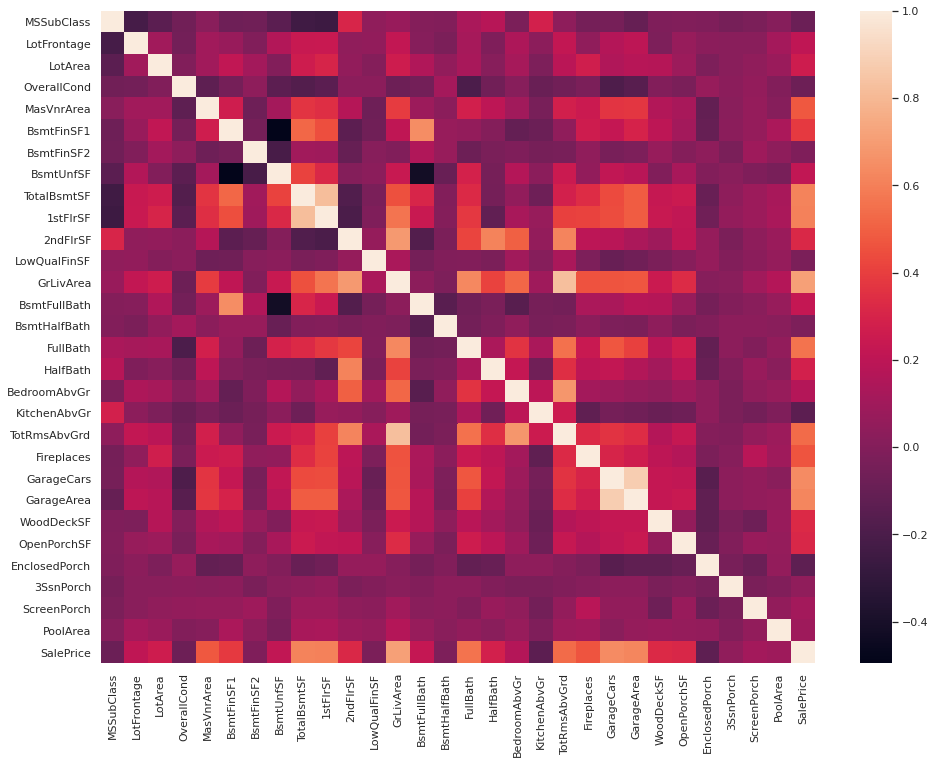

In [5]:
corr_map = df_train[num_features].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_map)

To plot the relationship between the sale price and the different categorical features, I used box plots for each feature. I found the code for plotting the categorical data from the following notebook: https://www.kaggle.com/kamakshisoni/comprehensive-data-exploration-with-python

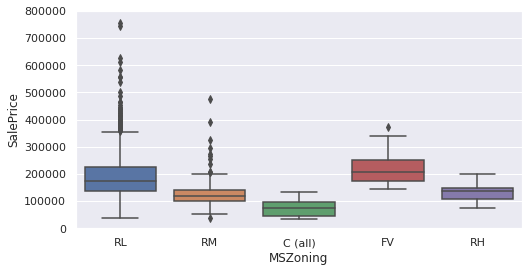

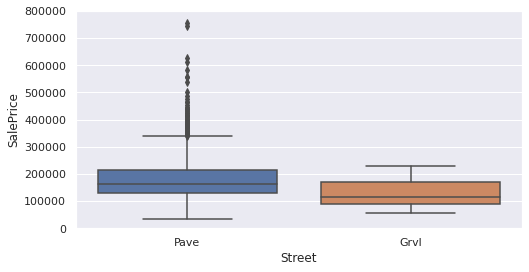

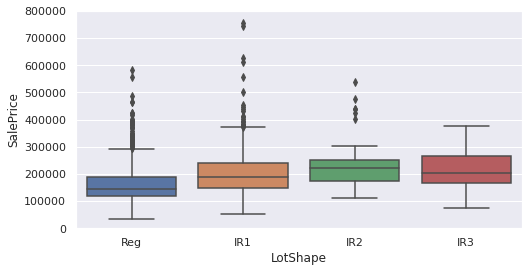

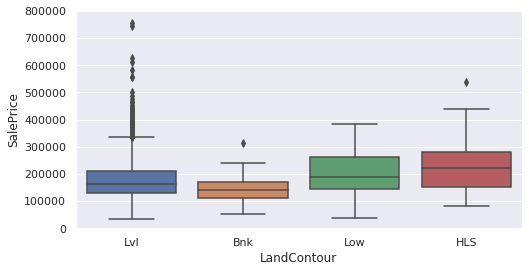

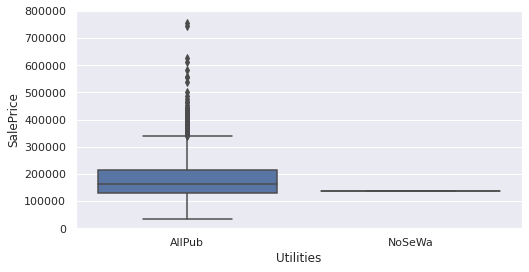

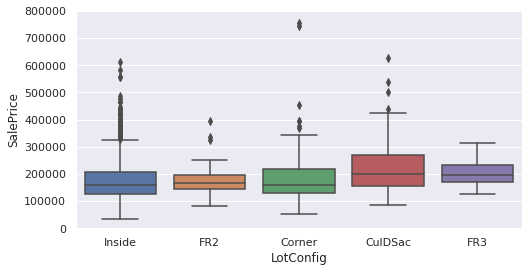

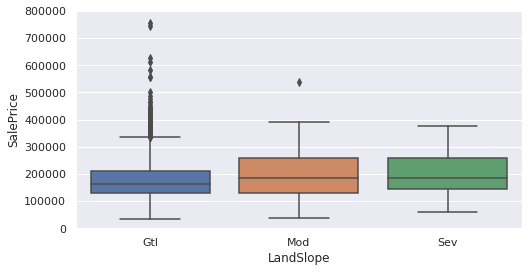

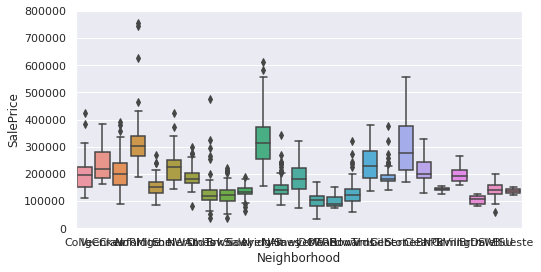

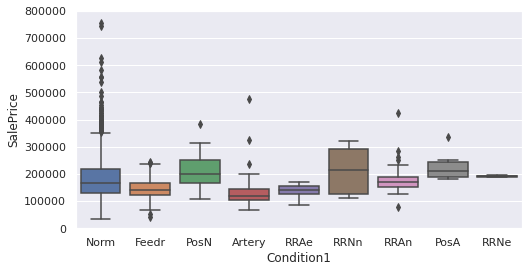

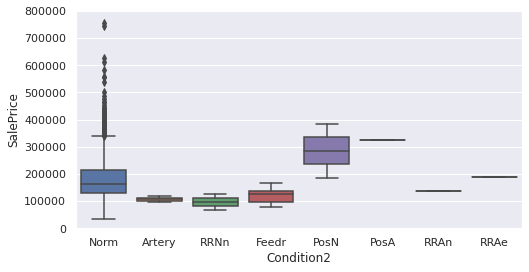

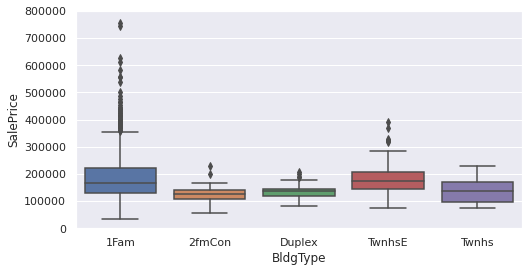

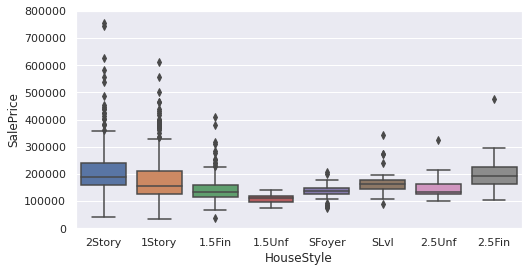

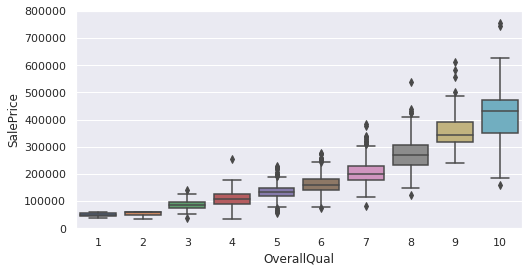

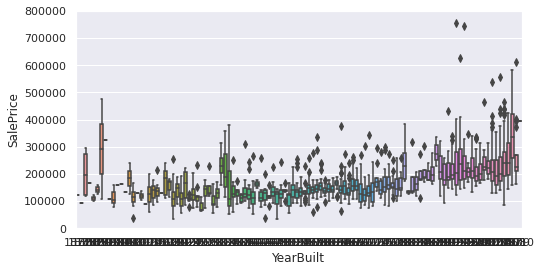

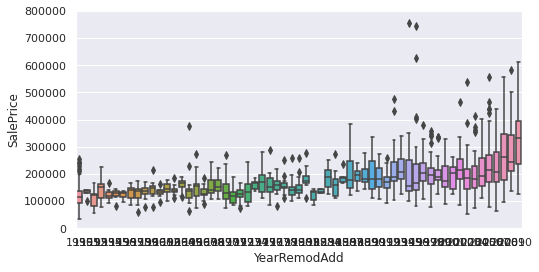

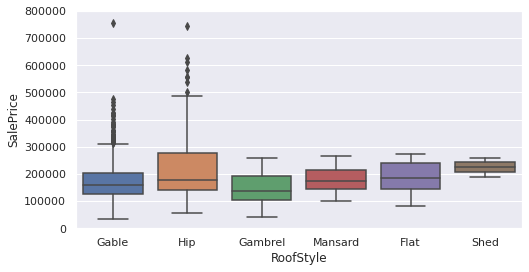

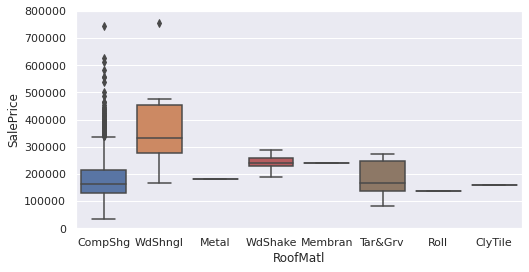

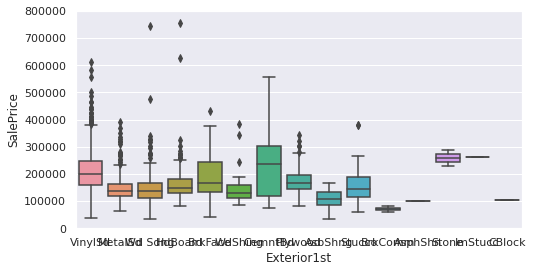

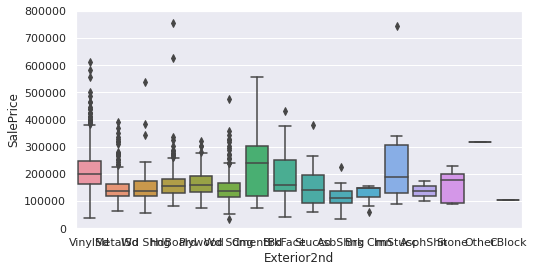

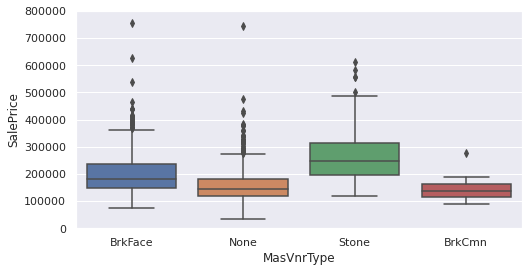

In [6]:
for i in range(20): # Attempting to print more than 20 plots at a time will hit a memory cap
    data = pd.concat([df_train['SalePrice'], df_train[cat_features[i]]], axis=1)
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.boxplot(x=cat_features[i], y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

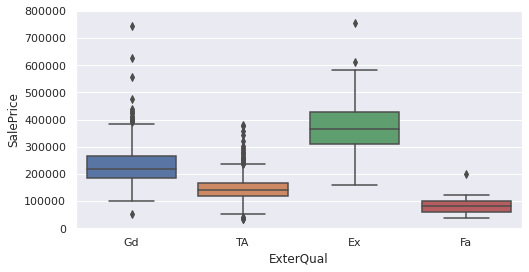

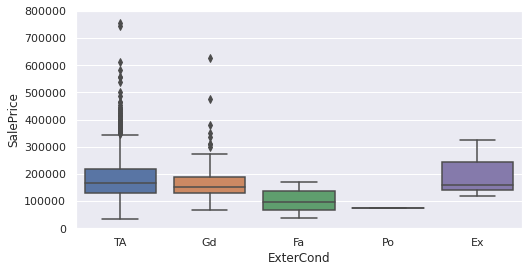

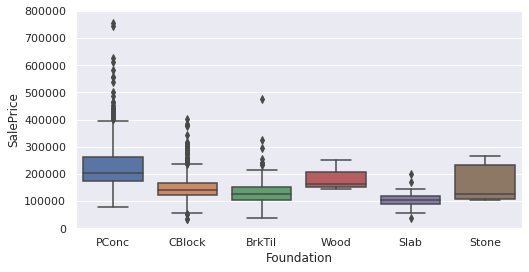

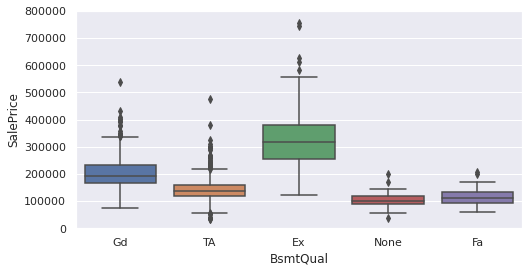

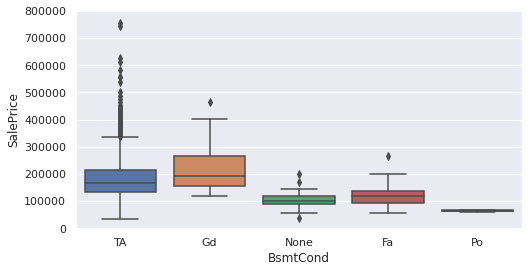

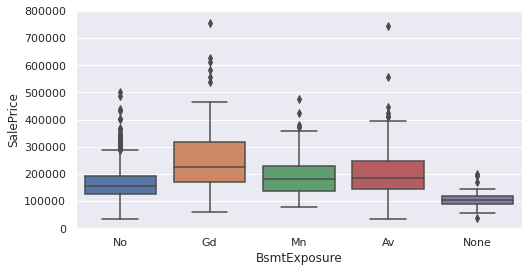

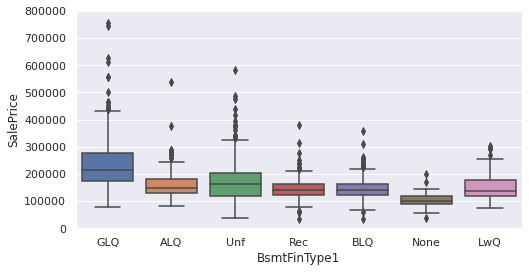

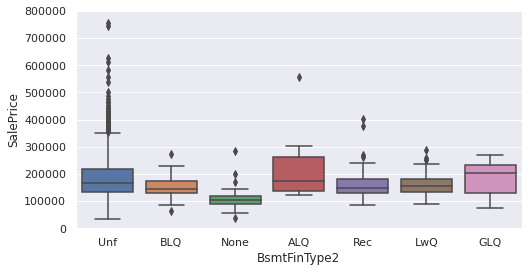

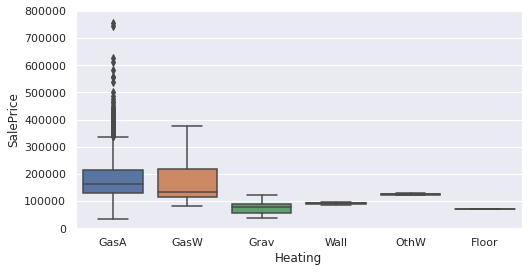

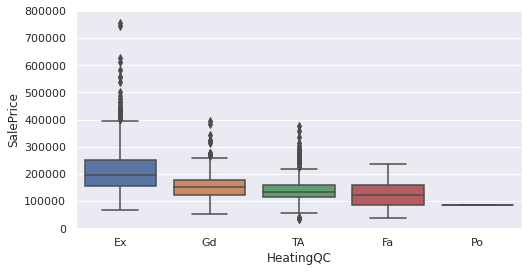

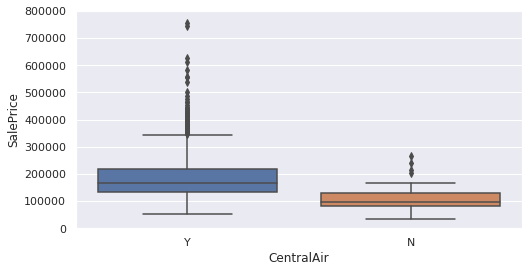

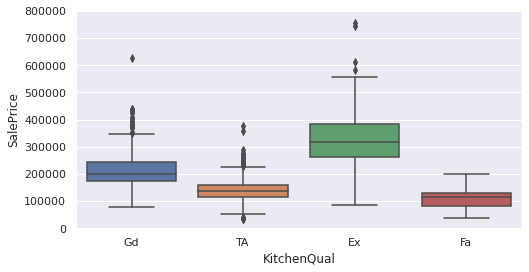

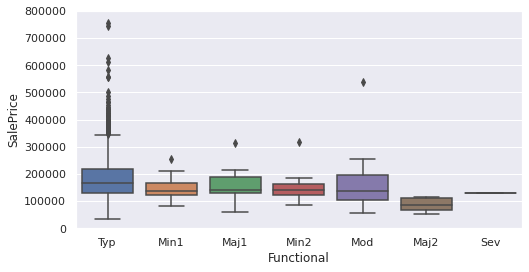

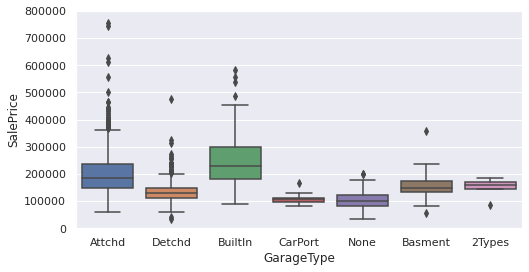

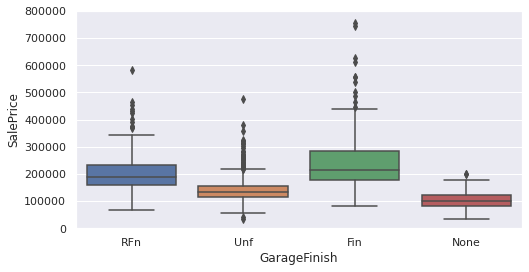

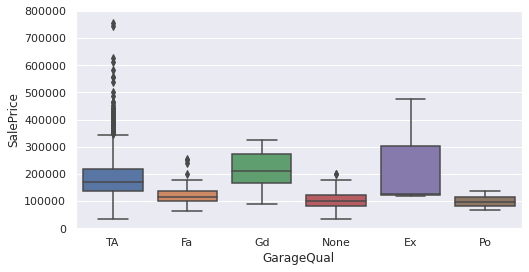

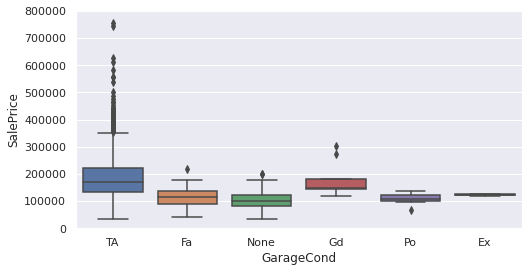

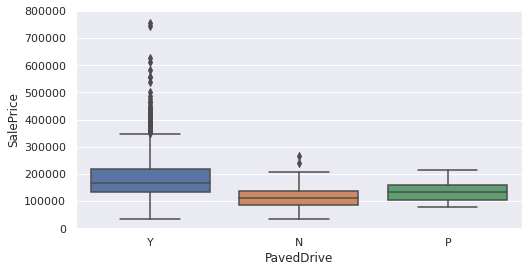

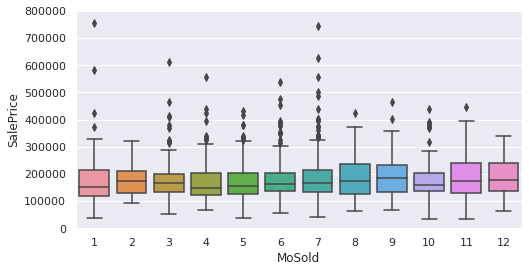

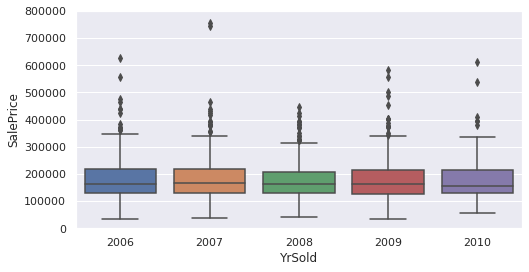

In [7]:
for j in range(20,40): # Plot the remaining features
    data = pd.concat([df_train['SalePrice'], df_train[cat_features[j]]], axis=1)
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.boxplot(x=cat_features[j], y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

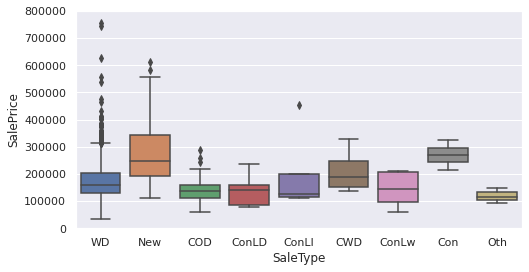

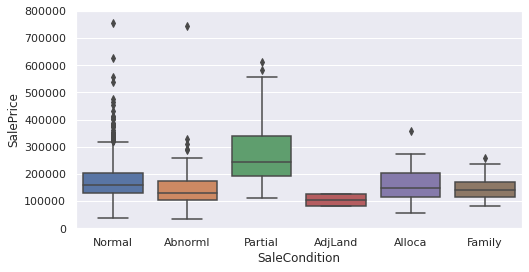

In [8]:
for z in range(40,42): # Attempting to print more than 20 plots at a time will hit a memory cap
    data = pd.concat([df_train['SalePrice'], df_train[cat_features[z]]], axis=1)
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.boxplot(x=cat_features[z], y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

Looking through the box plots of the categorical data, some features can be readily identified as having a relationship to the ultimate sale price of the property. I originally misclassified several categorical features as quantitative features, but once I corrected this, some more salient patterns in the categorical data emerged. Both the 'Year Built' and 'Year Remodelled' features correlated very strongly with the sale price of the residences; I decided to use the 'Year Built' feature for my model, because I suspect that there is some multicollinearity here (since the remodel year was the same as the build year for homes which had not been remodelled). The 'Overall Quality' feature was also correlated very strongly with the sale price, which does make intuitive sense, so I also decided to include this feature. 

Besides the more obviously correlated features described above, the categorical features which stood out to me the most were that which detailed the neighborhood in which the properties are located, as well as the type of exterior covering on the first floor. While I can't say with much confidence *why* these features seemed significant to me, I would suggest, for one, that because these features both had a lot of categories, there would be more specificity in terms of the range of values associated with a particular category. These plots also appeared more structured--that is to say, there appeared to be less overlap of price ranges between the categories for each of these features than for many of the others. 

While initially reluctant to rely on any categorical variables at all, as I figured I would have to use a dummy encoding for these categorical variables, I realized that I could have my regression model encode these categories automatically by using the statsmodels library to create my model with a statistical formula. In summary, I decided to start building my model of property sale price with three quantitative features (above-ground living area, number of cars storable in garage, & basement square footage) and four categorical features (year built, overall quality, first floor exterior type, and neighborhood). 

## Part 3: Models

To start, I decided to use the ordinary least squares method to create a multi-linear regression model involving several expanatory variables. I decided to utilize this method at first largely because its implementation seemed the most straightforward and required no additional effort to encode categorical features of the dataset. I felt far more confident about my ability to implement the OLS multi-linear regression technique than I did with any other technique, so this is the one I went with initially. Looking back on my notes, I realized there wasn't an overwhelmingly effificient way to test the predictions made by such a model; I would have to store separate coefficients for each category in the categorical features, and some such features had a *lot* of categories. So this initial model could probably better be described as a form of exploratory data analysis, inasmuch as it gave me additional insight into which features seem to serve as better predictors of residential sale price. The results below show suggest that a model based entirely on the Overall Quality rating and on the Neighborhood actually yields a reasonable adjusted r-squared value of about .750. When I included some of the other features in my regression model, I was able to raise the adjusted r-squared value as high as .830--although the condition number for this model was rather high (which, as the summary of regression results points out, could indicate strong multicollinearity or other numerical problems). 

In [9]:
# Categorical
# model_price = smf.ols(formula='SalePrice~C(Neighborhood)', data=df_train).fit() # adj. r-squared = .538
# model_price = smf.ols(formula='SalePrice~C(YearBuilt)', data=df_train).fit() # adj. r-squared = .393
# model_price = smf.ols(formula='SalePrice~C(OverallQual)', data=df_train).fit() # adj. r-squared = .682
# model_price = smf.ols(formula='SalePrice~C(Exterior1st)', data=df_train).fit() # adj. r-squared = .145

# Quantitative
# model_price = smf.ols(formula='SalePrice~GarageCars', data=df_train).fit() # adj. r-squared = .410
# model_price = smf.ols(formula='SalePrice~TotalBsmtSF', data=df_train).fit() # adj. r-squared = .376
# model_price = smf.ols(formula='SalePrice~GrLivArea', data=df_train).fit() # adj. r-squared = .502

# Full models
model_price = smf.ols(formula='SalePrice~C(OverallQual) + C(Neighborhood)', data=df_train).fit() # adj. r-squared = .750, cond. no. 98.1
# model_price = smf.ols(formula='SalePrice~GrLivArea + C(OverallQual) + C(Neighborhood)', data=df_train).fit() # adj. r-squared = .812
# model_price = smf.ols(formula='SalePrice~(GarageCars + GrLivArea) + C(OverallQual) + C(Neighborhood)', data=df_train).fit() # adj. r-squared = .820
# model_price = smf.ols(formula='SalePrice~(GarageCars * GrLivArea) + C(OverallQual) + C(Neighborhood)', data=df_train).fit() # adj. r-squared = .828
# model_price = smf.ols(formula='SalePrice~(GarageCars * GrLivArea) + C(YearBuilt) + C(OverallQual) + C(Neighborhood)', data=df_train).fit() # adj. r-squared = .830, cond. no. 1.57e+6



model_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:18:04   Log-Likelihood:                -17516.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1426   BIC:                         3.528e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   6.194e+04      3e+04      2.062      0.039    3020.190    1.21e+05
C(OverallQual)[T.2]         3784.7201   3.65e+04      0.104      0.917   -6.78e+04    7.54e+04
C(OverallQual)[T.3]         3.996e+04   2.96e+04      1.351      0.177   -1.81e+04     9.8e+04
C(OverallQual)[T.4]         5.458e+04   2.85e+04      1.916      0.056   -1292.990     1.1e+05
C(OverallQual)[T.5]         7.027e+04   2.84e+04      2.479      0.013    1.47e+04    1.26e+05
C(OverallQual)[T.6]         9.132e+04   2.84e+04      3.219      0.001    3.57e+04    1.47e+05
C(OverallQual)[T.7]         1.244e+05   2.85e+04      4.372      0.000    6.86e+04     1.8e+05
C(OverallQual)[T.8]         1.725e+05   2.86e+04      6.025      0.000    1.16e+05    2.29e+05
C(OverallQual)[T.9]         2.624e+05   2.92e+04      8.972      0.000    2.05e+05     3.2e+05
C(OverallQual)[T.10]        3.325e+05      3e+04     11.076      0.000    2.74e+05    3.91e+05
C(Neighborhood)[T.Blueste] -1.577e+04   2.99e+04     -0.528      0.598   -7.44e+04    4.29e+04
C(Neighborhood)[T.BrDale]  -4.219e+04   1.42e+04     -2.978      0.003      -7e+04   -1.44e+04
C(Neighborhood)[T.BrkSide] -1.102e+04   1.14e+04     -0.970      0.332   -3.33e+04    1.13e+04
C(Neighborhood)[T.ClearCr]   5.71e+04   1.24e+04      4.609      0.000    3.28e+04    8.14e+04
C(Neighborhood)[T.CollgCr]  1.733e+04   1.02e+04      1.693      0.091   -2746.983    3.74e+04
C(Neighborhood)[T.Crawfor]  4.303e+04   1.13e+04      3.813      0.000    2.09e+04    6.52e+04
C(Neighborhood)[T.Edwards] -1.257e+04   1.09e+04     -1.158      0.247   -3.39e+04    8716.055
C(Neighborhood)[T.Gilbert]  1.846e+04   1.07e+04      1.720      0.086   -2588.660    3.95e+04
C(Neighborhood)[T.IDOTRR]  -3.023e+04   1.21e+04     -2.501      0.013   -5.39e+04   -6517.765
C(Neighborhood)[T.MeadowV] -2.565e+04   1.42e+04     -1.812      0.070   -5.34e+04    2123.185
C(Neighborhood)[T.Mitchel]  8994.1275   1.15e+04      0.783      0.434   -1.35e+04    3.15e+04
C(Neighborhood)[T.NAmes]    4256.8837   1.04e+04      0.409      0.682   -1.61e+04    2.47e+04
C(Neighborhood)[T.NPkVill] -1.057e+04   1.67e+04     -0.633      0.527   -4.33e+04    2.22e+04
C(Neighborhood)[T.NWAmes]   2.296e+04   1.09e+04      2.114      0.035    1650.255    4.43e+04
C(Neighborhood)[T.NoRidge]   9.71e+04   1.17e+04      8.317      0.000    7.42e+04     1.2e+05
C(Neighborhood)[T.NridgHt]  4.928e+04   1.11e+04      4.453      0.000    2.76e+04     7.1e+04
C(Neighborhood)[T.OldTown] -1.914e+04   1.07e+04     -1.795      0.073   -4.01e+04    1776.615
C(Neighborhood)[T.SWISU]    -628.6322   1.28e+04     -0.049      0.961   -2.57e+04    2.45e+04
C(Neighborhood)[T.Sawyer]   3360.1348   1.12e+04      0.301      0.764   -1.86e+04    2.53e+04
C(Neighborhood)[T.SawyerW]  1.872e+04   1.1

To build an actual model, I had to encode the categorical variables. I used the LabelEncoder() method from scikit-learn to create an encoding of all the categorical features in both datasets. When I was creating tables for my test and training data, I realized that the test dataset did not contain data for the Sale Price target feature. I decided instead to split my training data up into halves, with one half actually used to train the model and the other half used to test it. I found the code for using scikit-learn's model_selection.train_test_split() method in the following thread: https://stackoverflow.com/questions/17412439/how-to-split-data-into-trainset-and-testset-randomly/39319000#39319000.

I also realized after I tried implementing my model that I was getting an enormous mean squared error result--something in the order of $10^{10}$. I realized that I hadn't normalized my target data, and since the target data 



In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables in the datasets
for column in cat_features:
    df_train[column] = LabelEncoder().fit_transform(df_train[column].astype('str'))
    df_test[column] = LabelEncoder().fit_transform(df_test[column].astype('str'))
    
# Divide training set into halves--one for training, one for testing
df_train, df_test = sklearn.model_selection.train_test_split(df_train, train_size = 0.5)

In [31]:
# Create tables for target data
dy_train = df_train['SalePrice']
dy_test = df_test['SalePrice']

predictors = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'Neighborhood', 'YearBuilt', 'OverallQual', 'Exterior1st']

# Create tables of predictor data
dX_train = df_train[predictors] # These features give a MSE = 0.2734
dX_test = df_test[predictors]

In [32]:
from sklearn.preprocessing import scale

dy_train = sklearn.preprocessing.scale(dy_train)
dy_test = sklearn.preprocessing.scale(dy_train)

# Create regression model
mod = sklearn.linear_model.LinearRegression()
skmodel_price = mod.fit(dX_train, dy_train)

# Generate predicted sale prices
predict_y = skmodel_price.predict(dX_train)

# Print out the error score for the model
print("MSE for this model:", sklearn.metrics.mean_squared_error(dy_test, predict_y))

MSE for this model: 0.27338840129478215


While I wanted to see if I couldn't improve upon the score by creating the model in a different way, I was honestly just relieved I was able to get anything to work. So I decided to just take my results from this model and run. I know that better performance is possible, but frankly I'm impressed that the model scored as well as it did. I have not been confident about my knowledge of data science throughout the course of this class, and I am certainly not very confident in my ability to produce viable machine learning models, so I am more than willing to settle for mediocre results just as long as they aren't *awful*.

Feature: GrLivArea
Importance: 0.0008826560725241527


Feature: TotalBsmtSF
Importance: 0.0003872804476525199


Feature: GarageCars
Importance: 0.23762466986370495


Feature: Neighborhood
Importance: 0.009149697181155221


Feature: YearBuilt
Importance: 0.007476001461569146


Feature: OverallQual
Importance: 0.04408242668414098


Feature: Exterior1st
Importance: 0.008737428118735785




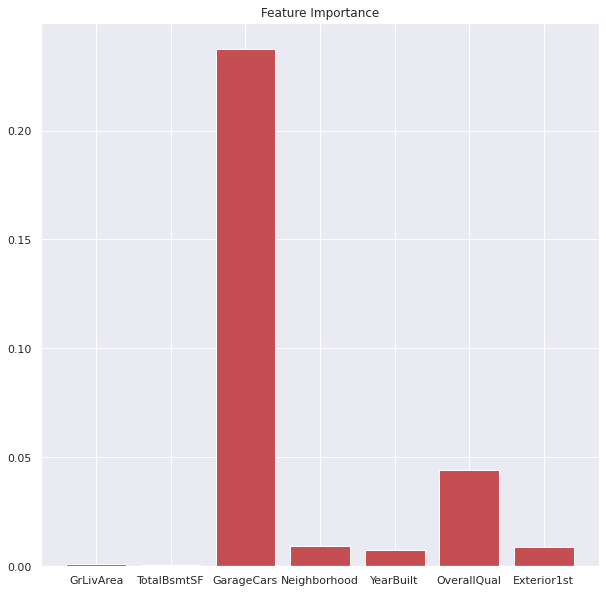

In [52]:
# Use model coefficients as indices of each feature's relative importance
importance = skmodel_price.coef_

# Summarize feature importance
for i in range(len(importance)):
    report = "Feature: {0}\nImportance: {1}\n\n".format(predictors[i], importance[i])
    print(report)
    
# Plot feature importance
plt.figure(figsize=(10,10))
plt.bar([feature for feature in predictors], importance, color='r')
plt.title(label="Feature Importance")
plt.show()

## Part 4: Results & Analysis